In [1]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from world_bank import countries, indices
from drake.utils import Entity

%matplotlib inline

In [2]:
cols = [str(i) for i in range(1991, 2019)]
cols = ["Country Name", "Indicator Name"] + cols

data = pd.read_csv(
    "../data/WDI_csv/WDIData.csv",
    usecols=cols
)

data = data[data["Country Name"].isin(countries)].reset_index(drop=True)
data = data[data["Indicator Name"].isin(indices)].reset_index(drop=True)

data

,Country Name,Indicator Name,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Albania,"Foreign direct investment, net (BoP, current US$)",NaN,-2.000000e+07,-5.800000e+07,-5.300000e+07,-7.000000e+07,-9.010000e+07,-4.750000e+07,-4.501000e+07,...,-9.507614e+08,-1.043512e+09,-8.466167e+08,-8.348030e+08,-1.225674e+09,-1.074294e+09,-9.102567e+08,-1.037329e+09,-1.128922e+09,-1.208920e+09
1,Albania,GDP (current US$),1.099559e+09,6.521750e+08,1.185315e+09,1.880952e+09,2.392765e+09,3.199643e+09,2.258516e+09,2.545967e+09,...,1.204422e+10,1.192696e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.186135e+10,1.302506e+10,1.510250e+10
2,Albania,Gross domestic savings (current US$),-1.880236e+08,-5.668191e+08,-4.562474e+08,-2.973055e+08,-1.296032e+08,-1.148987e+08,-1.890782e+08,-1.390249e+08,...,9.669072e+08,1.280162e+09,1.382727e+09,1.378375e+09,1.142852e+09,1.026611e+09,9.331103e+08,9.215835e+08,1.145142e+09,1.391769e+09
3,Albania,"Inflation, consumer prices (annual %)",NaN,2.260054e+02,8.500475e+01,2.256505e+01,7.793219e+00,1.272548e+01,3.318027e+01,2.064286e+01,...,2.231397e+00,3.622335e+00,3.429123e+00,2.031596e+00,1.937618e+00,1.625865e+00,1.896174e+00,1.275432e+00,1.986661e+00,2.028060e+00
4,Albania,"Labor force participation rate, total (% of to...",6.483500e+01,6.487100e+01,6.409800e+01,6.332700e+01,6.232000e+01,6.198900e+01,6.264100e+01,6.237200e+01,...,5.452100e+01,5.427000e+01,5.501800e+01,5.586100e+01,5.230900e+01,5.295200e+01,5.504100e+01,5.550200e+01,5.590800e+01,5.585300e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,United States,Gross domestic savings (current US$),1.209823e+12,1.274385e+12,1.333535e+12,1.458170e+12,1.535416e+12,1.655638e+12,1.820236e+12,1.917962e+12,...,2.176122e+12,2.296074e+12,2.389718e+12,2.674213e+12,2.935633e+12,3.133576e+12,3.318772e+12,3.287282e+12,3.416120e+12,3.641363e+12
514,United States,"Inflation, consumer prices (annual %)",4.234964e+00,3.028820e+00,2.951657e+00,2.607442e+00,2.805420e+00,2.931204e+00,2.337690e+00,1.552279e+00,...,-3.555463e-01,1.640043e+00,3.156842e+00,2.069337e+00,1.464833e+00,1.622223e+00,1.186271e-01,1.261583e+00,2.130110e+00,2.442583e+00
515,United States,"Labor force participation rate, total (% of to...",6.506400e+01,6.533300e+01,6.523100e+01,6.568200e+01,6.582700e+01,6.600100e+01,6.632700e+01,6.629700e+01,...,6.430600e+01,6.356900e+01,6.300000e+01,6.304600e+01,6.250100e+01,6.219600e+01,6.200700e+01,6.215800e+01,6.229400e+01,6.231300e+01
516,United States,"Net trade in goods (BoP, current US$)",-7.694000e+10,-9.689700e+10,-1.324510e+11,-1.658310e+11,-1.741700e+11,-1.910000e+11,-1.984280e+11,-2.482210e+11,...,-5.096960e+11,-6.486730e+11,-7.409970e+11,-7.411180e+11,-7.005380e+11,-7.499170e+11,-7.618660e+11,-7.498010e+11,-8.051970e+11,-8.873360e+11


In [3]:
grouped = data.groupby("Country Name")
entity_set = {}

for (name, group) in grouped:
    entity = group.drop("Country Name", axis=1).set_index("Indicator Name").T
    entity = entity[indices]
    raw_mean = entity.mean().to_numpy()
    raw_variance = entity.var().to_numpy()
    scaled_mean = (raw_mean - np.mean(raw_mean)) / np.std(raw_mean)
    scaled_variance = (raw_variance - np.mean(raw_variance)) / np.std(raw_variance)
    corr = entity.corr().to_numpy()
    entity_set[name] = Entity(name, corr, scaled_mean, scaled_variance)

In [4]:
from pickle import load

clustered_countries = load(open("clustered_countries.pkl", "rb"))
clustered_countries

{0: array(['Bahrain', 'Bolivia', 'China', 'Denmark', 'Eswatini', 'Finland',
        'Germany', 'Hungary', 'Italy', 'Korea, Rep.', 'Kuwait', 'Malaysia',
        'Netherlands', 'Nigeria', 'Norway', 'Saudi Arabia', 'Singapore',
        'Slovenia', 'Sweden', 'Switzerland', 'Thailand'], dtype='<U18'),
 1: array(['Malta', 'Mauritius'], dtype='<U18'),
 2: array(['Australia', 'Botswana', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
        'Colombia', 'Ecuador', 'France', 'Iceland', 'Indonesia', 'Israel',
        'Kenya', 'Madagascar', 'Mexico', 'Panama', 'Paraguay', 'Peru',
        'Spain', 'United Kingdom'], dtype='<U18'),
 3: array(['Albania', 'Cameroon', 'El Salvador', 'Ghana', 'India', 'Jamaica',
        'Jordan', 'Morocco', 'Niger', 'Philippines', 'Romania', 'Senegal',
        'South Africa', 'Sri Lanka', 'Tanzania', 'Togo', 'Tunisia',
        'United States'], dtype='<U18'),
 4: array(['Bangladesh', 'Costa Rica', 'Cyprus', 'Dominican Republic',
        'Egypt, Arab Rep.', 'Greece', 'Guatema

Bahrain, Bolivia, China, Denmark, Eswatini, Finland, Germany, Hungary, Italy, Korea, Rep., Kuwait, Malaysia, Netherlands, Nigeria, Norway, Saudi Arabia, Singapore, Slovenia, Sweden, Switzerland, Thailand


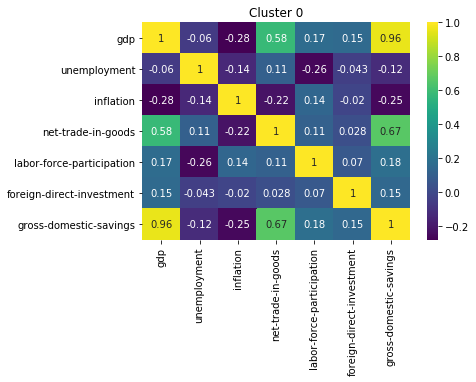

Malta, Mauritius


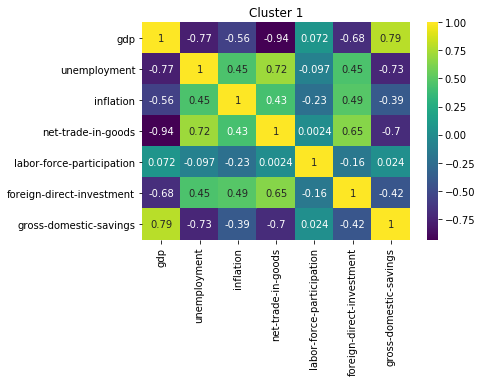

Australia, Botswana, Brazil, Bulgaria, Canada, Chile, Colombia, Ecuador, France, Iceland, Indonesia, Israel, Kenya, Madagascar, Mexico, Panama, Paraguay, Peru, Spain, United Kingdom


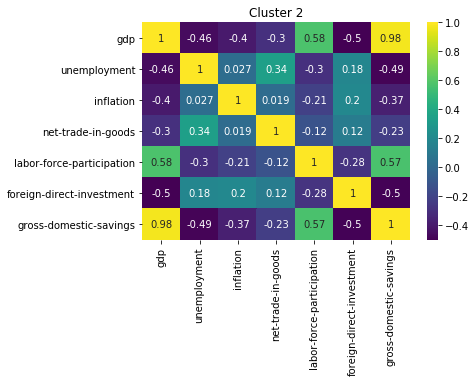

Albania, Cameroon, El Salvador, Ghana, India, Jamaica, Jordan, Morocco, Niger, Philippines, Romania, Senegal, South Africa, Sri Lanka, Tanzania, Togo, Tunisia, United States


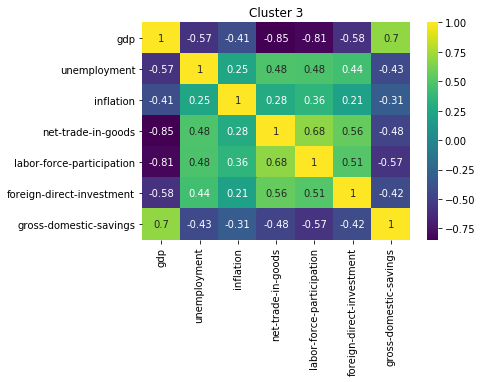

Bangladesh, Costa Rica, Cyprus, Dominican Republic, Egypt, Arab Rep., Greece, Guatemala, Haiti, Honduras, Mali, Pakistan, Portugal, Turkey


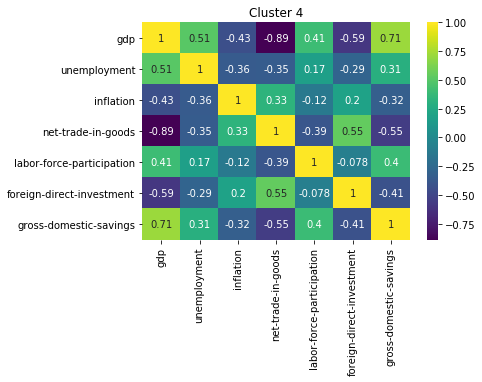

In [5]:
for i, country_list in clustered_countries.items():
    temp = []

    for country in country_list:
        temp.append(entity_set[country].correlation)

    sns.heatmap(
        np.array(temp).mean(axis=0),
        cmap="viridis",
        annot=True,
        xticklabels=indices.values(),
        yticklabels=indices.values()
    )
    plt.title(f"Cluster {i}")
    print(", ".join(country_list))
    plt.show()